In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 11

In [2]:
data = pd.read_csv('Preprocess_Completed.csv')
mae = data.loc[data['Department'] == 'MAE']
ece = data.loc[data['Department'] == 'ECE']
cse = data.loc[data['Department'] == 'CSE']
bio = data.loc[data['Department'] == 'BENG']

In [6]:
def plot_corr(x,y, dep):
    '''
    Plot the scatter between x and y 

    :param:
      x(np.ndarray): x axis values
      y(np.ndarray): y axis values
      dep(str): title department
    :return:
      None
    '''
    assert isinstance(x, np.ndarray) and isinstance(y, np.ndarray)
    assert isinstance(dep, str)
    plt.figure(figsize=(10,5))
    plt.scatter(x, y)
    plt.title(dep + ' professor recomended and gpa relationship', fontsize=20)
    plt.xlabel('Recommended Instructor percentage %', fontsize=16)
    plt.ylabel('Average Grade Received', fontsize=16)
    plt.show()
def find_corr(data, gb_str, s1, s2, dep):
    '''
    Find correction between two columns s1, s2 in data with unique gb_str (grouby this string)

    :param:
      data(pd.DataFrame): whole dataset
      gb_str(str): groupby this columns
      s1(str): column 1 wants to do correction
      s2(str): column 2 wants to do correction
      dep(str): department, use to plot
    :return:
      corr(pd.DataFrame): correction between s1, s2
    '''
    assert isinstance(data, pd.DataFrame)
    assert isinstance(gb_str, str)
    assert isinstance(s1, str)
    assert isinstance(s2, str)
    assert isinstance(dep, str)
    assert s1 in data.columns and s2 in data.columns and gb_str in data.columns
    unique_prof = data.groupby(by=gb_str)[s1,s2].mean().sort_values(by=s1)
    rmnd_prof = unique_prof[s1].values
    gpa = unique_prof[s2].values
    corr = unique_prof.corr(method='pearson')
    plot_corr(rmnd_prof, gpa, dep)
    return corr
gb_str = 'Instructor'
s1 = 'Rcmnd Instr'
s2 = 'Avg Grade Received'

### MAE

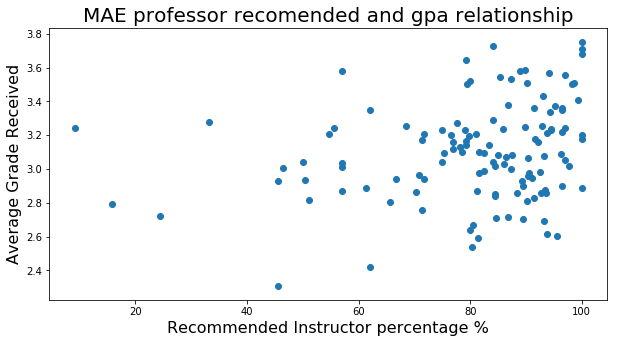

,Rcmnd Instr,Avg Grade Received
Rcmnd Instr,1.000000,0.248562
Avg Grade Received,0.248562,1.000000


In [7]:
cur_dep = "MAE"
find_corr(mae, gb_str, s1, s2, cur_dep)

### ECE

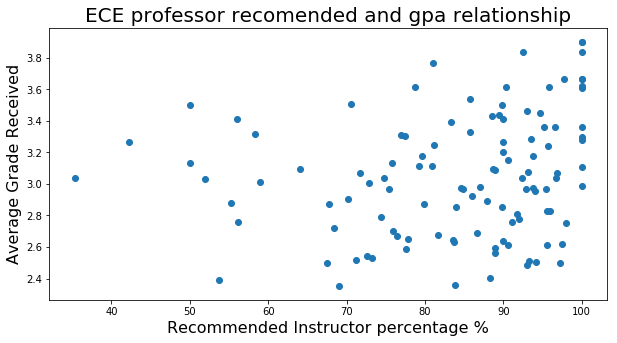

,Rcmnd Instr,Avg Grade Received
Rcmnd Instr,1.000000,0.196777
Avg Grade Received,0.196777,1.000000


In [8]:
cur_dep = "ECE"
find_corr(ece, gb_str, s1, s2, cur_dep)

### CSE

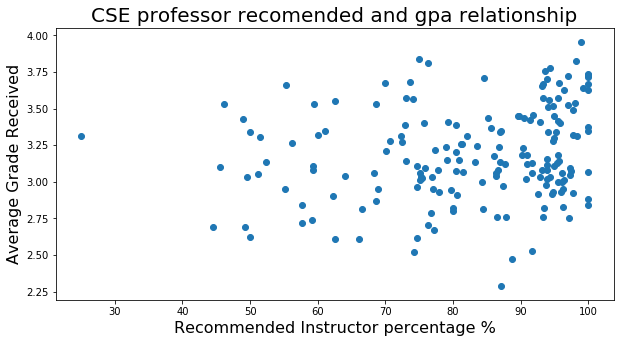

,Rcmnd Instr,Avg Grade Received
Rcmnd Instr,1.000000,0.197862
Avg Grade Received,0.197862,1.000000


In [9]:
cur_dep = "CSE"
find_corr(cse, gb_str, s1, s2, cur_dep)

### BENG

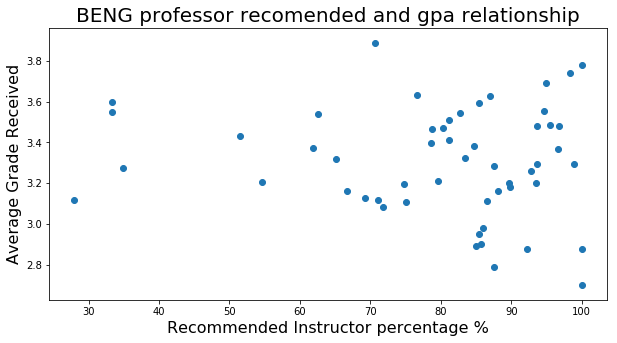

,Rcmnd Instr,Avg Grade Received
Rcmnd Instr,1.000000,-0.090562
Avg Grade Received,-0.090562,1.000000


In [10]:
cur_dep = "BENG"
find_corr(bio, gb_str, s1, s2, cur_dep)